# Estrategias con ETFs de sectores del SP500: optimizaciones iterativas e incorporación del ciclo de mercado.
Federico Fliguer, nov-2022

In [1]:
import random
random.seed(0)

## Introducción: El SP500 y su estructura de sectores

El S&P 500 es el índice más común utilizado para seguir el rendimiento del mercado de valores de EEUU (NYSE + NASDAQ). A menudo se habla del SP500 como una representación de todo el mercado de valores de EEUU y de las empresas estadounidenses en su conjunto, pero siguiendo a [the balance money](https://www.thebalancemoney.com/what-is-the-sector-weighting-of-the-s-and-p-500-4579847) eso no es del todo exacto.  Esto ocurre porque si bien del SP500 forman parte empresas de variadas capitalizaciones, sectores e industrias, tiene cierta inclinación a algunos sectores especificamente, cosa que fue variando a lo largo del tiempo. En primer lugar, basados en , veremos esta evaluación de composiciones.

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

sectors = ['Communication Services (VOX)', 'Consumer Discretionary (XLY)', 'Consumer Staples (XLP)', 'Energy (XLE)', 'Financials (XLF)', 'Health Care (XLV)',
           'Industrial (XLI)', 'Information Technology (XLK)', 'Materials (XLB)', 'Real Estate (IYR)', 'Utilities (XLU)']
composition_2002 = [0.05,0.05,0.13,0.07,0.2,0.15,0.12,0.16,0.02,0.01,0.03]
composition_2003 = [0.05,0.06,0.12,0.07,0.2,0.15,0.12,0.17,0.02,0.01,0.03]
composition_2004 = [0.16,0.07,0.1,0.07,0.19,0.12,0.11,0.13,0.02,0.01,0.03]
composition_2005 = [0.26,0.05,0.08,0.07,0.17,0.1,0.1,0.11,0.02,0.01,0.03]
composition_2006 = [0.27,0.05,0.08,0.08,0.17,0.09,0.09,0.11,0.02,0.02,0.03]
composition_2007 = [0.34,0.04,0.07,0.08,0.13,0.09,0.08,0.1,0.02,0.01,0.03]
composition_2008 = [0.26,0.04,0.1,0.09,0.12,0.1,0.08,0.13,0.02,0.01,0.03]
composition_2009 = [0.35,0.05,0.08,0.07,0.12,0.09,0.07,0.12,0.02,0.01,0.02]
composition_2010 = [0.32,0.06,0.08,0.07,0.12,0.08,0.08,0.12,0.02,0.02,0.02]
composition_2011 = [0.33,0.06,0.09,0.07,0.1,0.08,0.07,0.13,0.02,0.02,0.03]
composition_2012 = [0.33,0.06,0.08,0.07,0.11,0.08,0.07,0.14,0.02,0.02,0.02]
composition_2013 = [0.38,0.06,0.07,0.06,0.11,0.09,0.07,0.11,0.02,0.02,0.02]
composition_2014 = [0.1,0.09,0.1,0.07,0.16,0.14,0.1,0.16,0.02,0.03,0.03]
composition_2015 = [0.13,0.1,0.1,0.06,0.14,0.14,0.09,0.16,0.02,0.03,0.03]
composition_2016 = [0.13,0.09,0.1,0.06,0.15,0.12,0.1,0.17,0.02,0.03,0.03]
composition_2017 = [0.13,0.1,0.09,0.05,0.15,0.12,0.09,0.19,0.02,0.03,0.03]
composition_2018 = [0.13,0.1,0.08,0.04,0.13,0.14,0.08,0.22,0.02,0.03,0.03]
composition_2019 = [0.14,0.1,0.08,0.04,0.13,0.13,0.08,0.23,0.02,0.03,0.03]
composition_2020 = [0.14,0.13,0.07,0.02,0.1,0.12,0.08,0.26,0.02,0.02,0.02]
composition_2021 = [0.15,0.13,0.06,0.03,0.11,0.13,0.07,0.25,0.02,0.03,0.02]

df_real_compositions = pd.DataFrame({'sector': sectors,
                  '2002': composition_2002,
                  '2003': composition_2003,
                  '2004': composition_2004,
                  '2005': composition_2005,
                  '2006': composition_2006,
                  '2007': composition_2007,
                  '2008': composition_2008,
                  '2009': composition_2009,
                  '2010': composition_2010,
                  '2011': composition_2011,
                  '2012': composition_2012,
                  '2013': composition_2013,
                  '2014': composition_2014,
                  '2015': composition_2015,
                  '2016': composition_2016,
                  '2017': composition_2017,
                  '2018': composition_2018,
                  '2019': composition_2019,
                  '2020': composition_2020,
                  '2021': composition_2021})

df_real_compositions = pd.melt(df_real_compositions, id_vars = 'sector', value_vars = ['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
df_real_compositions.columns = ['Sector', 'Año', 'Porcentaje de ponderación']
df_real_compositions['Año'] = df_real_compositions['Año'].astype(int)
fig = px.bar(df_real_compositions, x="Año", y="Porcentaje de ponderación", color="Sector", text="Sector")
fig.show()


Fuente: https://einvestingforbeginners.com/historical-sp-500-industry-weights-20-years/

El cambio que se observa con mayor fuerza más observable es la disminución en 2014 de la ponderación de Communication Services (15% frente a máximos de 38% en 2013) y en contrapartida el aumento progresivo de Information Technology (25% en 2021 frente a mínimos de 11% en 2013). Muchas son las razones que motivan estos cambios en las composiciones del mercado, que en definitiva responden a ingresos y salidas de empresas que es lo que compone el SP500. Para que una empresa pueda formar parte debe cumplir ciertas condiciones, entre las que están la de tener una capitalización de mercado de al menos $14.6B. Adicionalmente, la asignación de una empresa a uno de los sectores puede tener cierto componente de discrecionalidad, como en el caso de Google cuyo sector es Communication Services por su participación en el negocio del advertising, pero bien podría verse como una empresa tecnológica. En cualquier caso, el gráfico muestra que estos cambios en las composiciones no son menores. El objetivo de este trabajo es tomar a los ETFs sectores del SP500 como activos disponibles para invertir, y mediante dos enfoques vistos durante el curso (optimización de portafolios y backtesting de estrategias) determinar la posibilidad de constituir un portafolio superador al del SP500.

La API yfinance permite obtener diariamente las series del SP500 y también la de cada uno de sus sectores, que coinciden con los de los ETFs que las representan. Para empezar, descargaremos la serie diaria para el período 2005-2022 completa de los once sectores (más el SP500), teniendo la ventaja de que por tratarse de sectores que siempre formaron parte del índice (con distintas pondreaciones) no tenemos sesgos de inclusión ni de exclusión.

In [3]:
!pip3 install yfinance
import yfinance as yf

start = '2004-12-31'
end = '2022-12-31'

etfs_list = ['XLY', 'XLP', 'XLV', 'XLI', 'XLK', 'XLB', 'IYR', 'VOX', 'XLU', 'XLF', 'XLE', 'SPY']
df_sectors = yf.download(etfs_list, start=start, end=end)['Adj Close']
df_sectors = df_sectors.loc[~(df_sectors==0).any(axis=1)] 
df_sectors = df_sectors[etfs_list]

df_sectors.columns = ['Consumer Discretionary (XLY)',
                      'Consumer Staples (XLP)',
                      'Health Care (XLV)',
                      'Industrial (XLI)',
                      'Information Technology (XLK)',
                      'Materials (XLB)',
                      'Real Estate (IYR)',
                      'Communication Services (VOX)',
                      'Utilities (XLU)',
                      'Financials (XLF)',
                      'Energy (XLE)',
                      'SP500']
df_sectors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.7 MB/s 
     |████████████████████████████████| 4.0 MB 8.1 MB/s 
     |████████████████████████████████| 128 kB 59.4 MB/s 
     |████████████████████████████████| 110 kB 62.7 MB/s 
     |████████████████████████████████| 112 kB 60.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
[*********************100%***********************] 

,Consumer Discretionary (XLY),Consumer Staples (XLP),Health Care (XLV),Industrial (XLI),Information Technology (XLK),Materials (XLB),Real Estate (IYR),Communication Services (VOX),Utilities (XLU),Financials (XLF),Energy (XLE),SP500
Date,,,,,,,,,,,,
2004-12-31,27.903660,14.488266,22.235037,21.781441,16.552189,19.911137,30.854456,36.022667,14.803761,17.088692,22.149172,85.296593
2005-01-03,27.721786,14.488266,21.977266,21.592152,16.411045,19.710215,30.471285,35.950500,14.633664,17.027128,21.331991,84.894333
2005-01-04,27.397600,14.438049,21.800501,21.325762,16.105261,19.355261,30.053036,35.812691,14.532669,16.864794,21.222216,83.857002
2005-01-05,27.294815,14.362720,21.763680,21.178535,16.050369,19.087362,28.928553,35.366512,14.304106,16.836809,21.130739,83.278313
2005-01-06,27.152487,14.431764,21.925711,21.248642,16.003328,19.214615,29.176497,35.405891,14.378516,16.920771,21.496630,83.701736
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-15,136.087036,74.694366,136.965790,98.052002,128.820114,78.908806,86.709999,82.330002,71.118095,33.748379,84.539299,387.848999
2022-12-16,133.544006,74.327003,134.973999,97.633995,127.115005,78.570999,84.519997,82.040001,69.908005,33.490002,83.500000,383.269989
2022-12-19,131.399994,74.279999,134.470001,97.120003,125.419998,77.550003,83.519997,80.349998,69.629997,33.400002,83.489998,380.019989


## Optimización de portafolio de sectores

El primer enfoque para la constitución de un portafolio de ETFs sectores consistirá en una optimización vía sharpe ratio, es decir la búsqueda de aquellos portafolios de sectores que maximizan la relación entre el retorno y el riesgo. Como sucede habitualmente, no es correcto realizar una única optimización ex-post sino que para tener consistencia intertemporal debemos rollear en el tiempo la optimización de sectores. Para mantener la consistencia con el análisis realizado de la evolución de los componentes del SP500, el rolling de los períodos será anual, tanto para la recomposición del portafolio (todos los años se recalibra de cara al próximo año) como para la ventana de observación (la maximización para un año se hace mirando el sharpe ratio de un año hacia atrás). Siguiendo los criterios utilizados en el módulo de optimización de carteras, para evitar la influencia excesiva del componente azaroso de las simulaciones se seleccionan las 10 simulaciones que maximizan el sharpe, y se compone un único portafolio basado en esas 10 con iguales ponderaciones (1/10).

In [4]:
import sys
import tqdm
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
from datetime import timedelta

time_index = pd.date_range(start=start, end=end, freq='1Y')
time_index_from = list(time_index[:-1])
time_index_to = list(time_index[1:])
dfs = []
rets_log = np.log(df_sectors/df_sectors.shift(1))
for i in range (len(time_index_from)):
    df = rets_log.loc[(rets_log.index >= time_index_from[i]) & (rets_log.index <= time_index_to[i])].copy()
    df.dropna(axis=1, thresh=40, inplace=True)
    dfs.append(df)

def simular(data, tickers, q, n_stocks=3, p_min=0.01, p_max=0.99):
    
    datos = []
    with tqdm.tqdm(total=q, file=sys.stdout) as pbar:
        for i in range(q):
            pbar.update()
            tickers_muestra = random.sample(tickers, n_stocks)
            #print(tickers_muestra)
            muestra = data[tickers_muestra]
                        
            # Restriccion de minimo
            ponds = np.random.dirichlet(np.ones(n_stocks),100)
            pond = np.array([p for p in ponds if (p.min()>p_min) & (p.max()<p_max)][0])
            #print(pond)
            r={}
            r['activos'] = list(muestra.columns)
            r['pesos'] = pond.round(3)
            r['retorno'] = np.sum( (muestra.mean() * pond * 252))
            r['volatilidad'] = np.sqrt(np.dot(pond, np.dot(muestra.cov()*252, pond)))
            r['sharpe'] = round(r['retorno'] / r['volatilidad'],3) 
            #print(r['sharpe'])
            datos.append(r)

    df = pd.DataFrame(datos).sort_values('sharpe', ascending=False)

    return df

def top10(ret_log, lista_tickers, q_inicial=1000, rondas=10, n_stocks=6):
    portfolios = simular(ret_log, lista_tickers, q_inicial, n_stocks=n_stocks, p_min=0.01, p_max=0.99)
    best = pd.DataFrame()
    for i in range(rondas):
        qsim = int(q_inicial/(i+2))
        qtop = qsim//3

        top = portfolios.iloc[ : qtop]
        lista_tickers = list(np.array(top.activos.apply(pd.Series).stack()))
        portfolios = simular(ret_log, lista_tickers, qsim, n_stocks=n_stocks, p_min=0.01, p_max=0.99) 
        best = pd.concat([best,portfolios.iloc[:10]])

    top10 = best.sort_values('sharpe', ascending=False).head(10)
    return top10

tops = []
for i, df in enumerate(dfs):
  print('Proceso N°',i+1,'de',len(dfs))
  print('Desde',time_index_from[i],'Hasta',time_index_to[i],'\n')
  top = top10(df, list(df.columns), q_inicial=1000, rondas=3, n_stocks=11)
  tops.append(top) 

Proceso N° 1 de 18
Desde 2004-12-31 00:00:00 Hasta 2005-12-31 00:00:00 

100%|██████████| 250/250 [00:00<00:00, 333.21it/s]
Proceso N° 2 de 18
Desde 2005-12-31 00:00:00 Hasta 2006-12-31 00:00:00 

100%|██████████| 250/250 [00:01<00:00, 152.19it/s]
Proceso N° 3 de 18
Desde 2006-12-31 00:00:00 Hasta 2007-12-31 00:00:00 

100%|██████████| 250/250 [00:00<00:00, 330.79it/s]
Proceso N° 4 de 18
Desde 2007-12-31 00:00:00 Hasta 2008-12-31 00:00:00 

100%|██████████| 250/250 [00:00<00:00, 339.51it/s]
Proceso N° 5 de 18
Desde 2008-12-31 00:00:00 Hasta 2009-12-31 00:00:00 

100%|██████████| 250/250 [00:00<00:00, 333.24it/s]
Proceso N° 6 de 18
Desde 2009-12-31 00:00:00 Hasta 2010-12-31 00:00:00 

100%|██████████| 250/250 [00:00<00:00, 333.39it/s]
Proceso N° 7 de 18
Desde 2010-12-31 00:00:00 Hasta 2011-12-31 00:00:00 

100%|██████████| 250/250 [00:00<00:00, 324.78it/s]
Proceso N° 8 de 18
Desde 2011-12-31 00:00:00 Hasta 2012-12-31 00:00:00 

100%|██████████| 250/250 [00:00<00:00, 333.71it/s]
Proceso 

Realizadas las optimizaciones, hay dos enfoques que deben abordarse: analizar la conveniencia de esta optimización rolleada en el tiempo (backtesting) y, por otro lado, comprarar para cada año la ponderación original del SP500 con la ponderación por maximización del ratio de Sharpe. Empezaremos por esto último.

In [5]:
ponderaciones_sharpe = pd.DataFrame(columns = ['Año', 'Sector', 'Value'])
j = 0
for time_index in time_index_from[2:]:
  df_top = tops[j].reset_index(drop=True)
  for fila in range(0, 10):
    ponderaciones_fila = pd.DataFrame(columns = ['Año', 'Sector', 'Value'])
    for value in range(0, 8):
      ponderaciones_fila = ponderaciones_fila.append(
          {'Año': time_index.year,
           'Sector': df_top['activos'][fila][value],
           'Value': df_top['pesos'][fila][value]}, 
                    ignore_index=True)
    ponderaciones_fila = ponderaciones_fila.groupby(['Sector', 'Año'])['Value'].sum().reset_index()
    ponderaciones_sharpe = pd.concat([ponderaciones_sharpe, ponderaciones_fila])
  j = j + 1

ponderaciones_sharpe_grouped = pd.DataFrame(ponderaciones_sharpe.groupby(['Sector', 'Año'])['Value'].mean()).reset_index()
ponderaciones_sharpe_grouped = ponderaciones_sharpe_grouped.sort_values(by='Año')
df_sharpe_compositions = pd.DataFrame()
for year in ponderaciones_sharpe_grouped.Año.unique():
  df_sharpe_compositions_year = ponderaciones_sharpe_grouped[ponderaciones_sharpe_grouped['Año'] == year].copy()
  df_sharpe_compositions_year['Value'] = df_sharpe_compositions_year['Value'] / df_sharpe_compositions_year['Value'].sum()
  df_sharpe_compositions = pd.concat([df_sharpe_compositions, df_sharpe_compositions_year])

df_compositions = pd.merge(df_real_compositions, df_sharpe_compositions, how='inner', left_on=['Sector' ,'Año'], right_on=['Sector' ,'Año']).fillna(0)
df_compositions.columns = ['Sector', 'Año', 'Participacion SP500', 'Participación Sharpe']
df_compositions['Participación Sharpe'] = round(df_compositions['Participación Sharpe'], 2)
df_compositions.tail(20)

,Sector,Año,Participacion SP500,Participación Sharpe
123,Utilities (XLU),2019,0.03,0.12
124,Communication Services (VOX),2020,0.14,0.07
125,Consumer Discretionary (XLY),2020,0.13,0.04
126,Consumer Staples (XLP),2020,0.07,0.13
127,Financials (XLF),2020,0.10,0.06
128,Health Care (XLV),2020,0.12,0.03
129,Industrial (XLI),2020,0.08,0.04
130,Information Technology (XLK),2020,0.26,0.18
131,Real Estate (IYR),2020,0.02,0.16
132,Utilities (XLU),2020,0.02,0.27


La ponderación que asigna el SP500 ahora es contrastable con la ponderación que asigna una optimización de carteras basada en el ratio de sharpe, observando un año hacia atrás y manteniendo la cartera un año hacia adelante. Veamos ahora la correlación y las evoluciones de las composiciones por sectores.

In [6]:
print('Correlación entre las dos composiciones: ', round(df_compositions['Participacion SP500'].corr(df_compositions['Participación Sharpe']),2))

Correlación entre las dos composiciones:  0.01


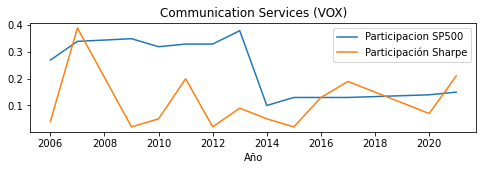

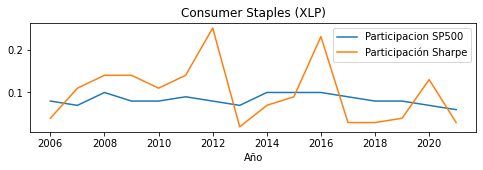

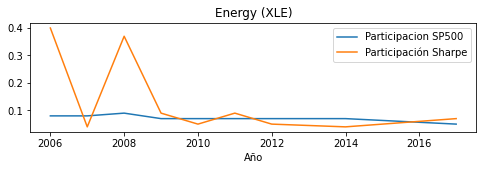

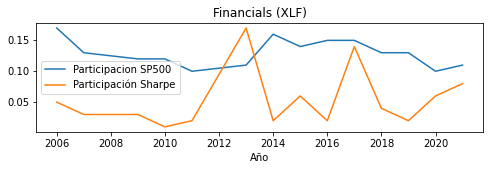

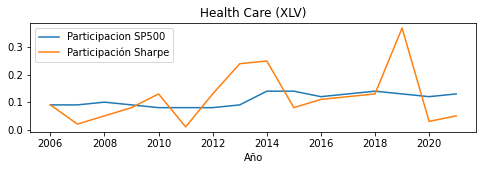

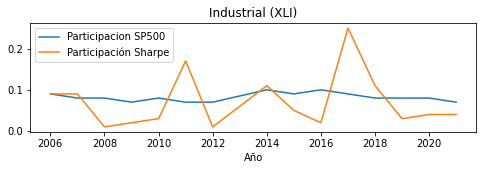

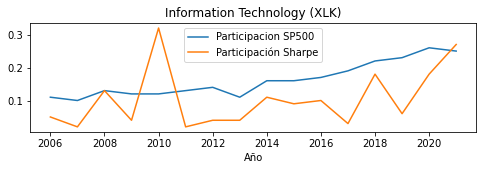

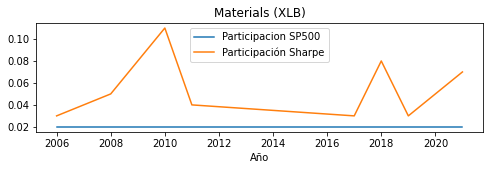

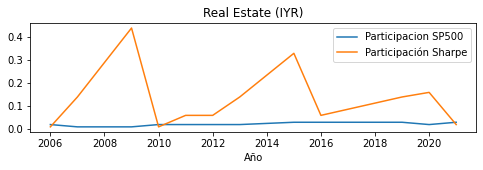

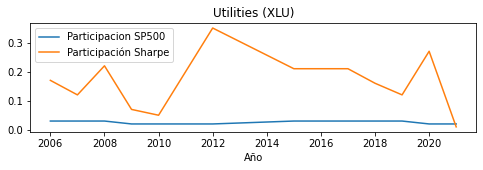

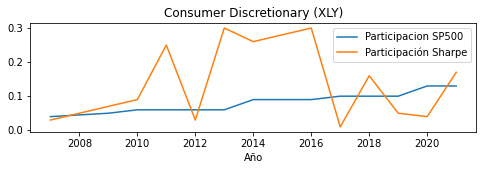

In [7]:
sectors = df_compositions.Sector.unique()
for sector in sectors:
  df_compositions[df_compositions['Sector'] == sector].plot(x="Año", y=["Participacion SP500", "Participación Sharpe"], figsize=(8, 2), title=sector)

La ausencia de correlación muestra, en primer lugar, que la optimización del ratio de sharpe en un rolling anual no es el método por el que el SP500 recalibra el peso de los sectores en su índice. Además, una diferencia importante entre las dos evoluciones está en que la variabilidad es mucho mayor en el caso de la maximización del ratio de sharpe: esto da la pauta que probablemente el enfoque que explique esa diferencia tenga que ver con la ventana de observación, siendo demasiado poco un año. Al realizarse de esta manera, la optimización de Sharpe tuvo incentivos a sobreponderar ese único año, mientras que el SP500 si observa más años hacia atrás probablemente tenga incentivos a tener movimientos más suaves. Una vez analizadas las composiciones, evaluaremos en forma comparada la optimización del portafolio por medio de una optimización del ratio de sharpe contra un buy and hold del SP500.

[*********************100%***********************]  1 of 1 completed


[]

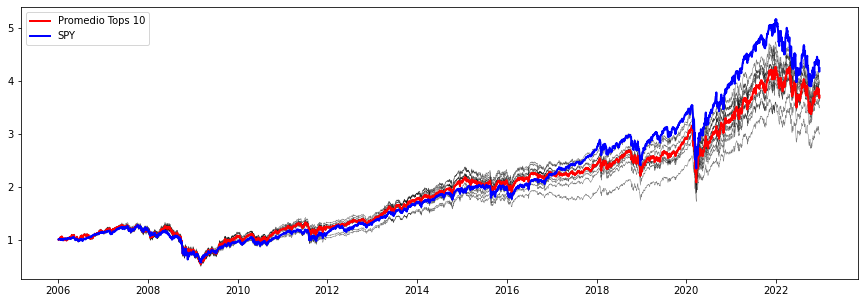

In [8]:
activos, pesos = [], []
for i in range(10):
    activos.append([df.iloc[i].activos for df in tops])
    pesos.append([df.iloc[i].pesos for df in tops])

resumen = pd.DataFrame()

for top_nro in range(10):
    lista_rendimientos = []
    
    for i in range(1,len(dfs)):
        filtro_fecha = df_sectors.loc[(df_sectors.index >= time_index_from[i]) & (df_sectors.index <= time_index_to[i])]
        filtro_activos = filtro_fecha[activos[top_nro][i-1]].dropna()
        r = filtro_activos.pct_change()
        w = pesos[top_nro][i-1]
        fechas = pd.to_datetime(filtro_activos.index)
        lista_rendimientos.append(pd.Series(np.dot(r, w), index=fechas).dropna())

    rendimientos = pd.concat(lista_rendimientos)
    resumen['Test_'+str(top_nro)] = (rendimientos+1).cumprod()
    
spy = yf.download('SPY', start=pd.to_datetime(start) + timedelta(days=365), end=end, auto_adjust=True)
spy['pctChange'] = spy.Close.pct_change()
spy['rendimiento_acum'] = (spy.pctChange+1).cumprod()

fig, ax = plt.subplots(figsize=(15,5))
for columna in resumen.columns:
    ax.plot(resumen[columna], 'k', alpha=0.5, lw=0.5)
ax.plot(resumen.iloc[:,:-1].mean(axis=1), 'red', lw=2, label='Promedio Tops 10')
ax.plot(spy['rendimiento_acum'], 'blue', lw=2, label='SPY')
ax.legend()
ax.plot()

La estrategia que optimiza anualmente mirando el ratio de Sharpe los diferentes sectores del SP500 tiene un rendimiento muy similar que el buy and hold del SP500.

## Transiciones entre sectores e incorporación del ciclo de mercado

Hasta ahora, se ha observado que el enfoque de optimización de cartera por medio del ratio de sharpe con una ventana de observación relativamente corta (un año) no coincide con la asignación de sectores que realiza el SP500 para su actualización, ni tampoco genera una mejora en términos de performance en el backtesting. Sin embargo, esta optimización tiene una memoria a muy corto plazo, y se podría pensar en alternativas para extender en el tiempo esa memoria. Una podría ser, desde ya, mirar más atrás que un año. Pero para variar alternativas, podría pensarse también en una regularidad entre los sectores que resultan convenientes, pensando en que el hecho de que en un período de tiempo el sector que mejor performó haya sido uno, anticipa que en un próximo período podría ser otro. Empezaremos analizando esas transiciones.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


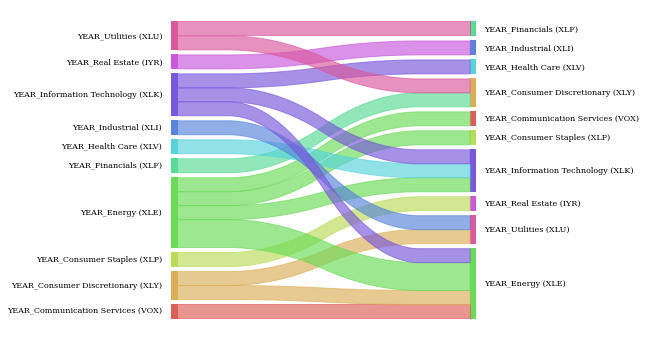

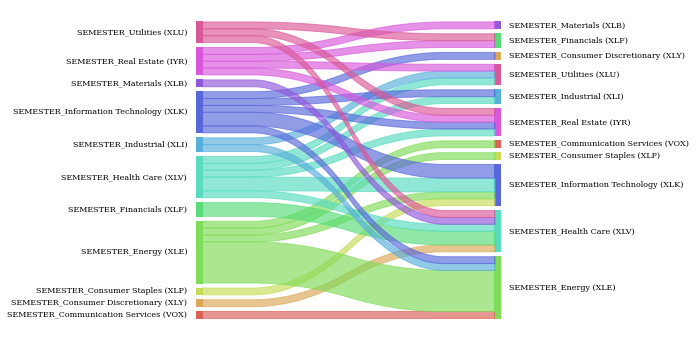

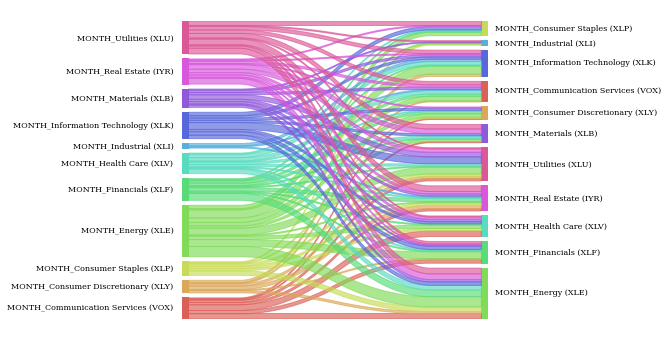

In [9]:
for column in df_sectors.columns:
    name = 'pct_change_' + column
    df_sectors[name] = df_sectors[column].pct_change() * 100
    
df_sectors['Year'] = df_sectors.index.year
df_sectors['Year'] = df_sectors['Year'].astype(object)
df_sectors = df_sectors[df_sectors.Year >= 2002].reset_index()
df_sectors['Month'] = df_sectors['Date'].dt.strftime('%Y%m')
df_sectors['Semester'] = df_sectors.Date.dt.year.astype(str) + 'S'+ np.where(df_sectors.Date.dt.quarter.gt(2),2,1).astype(str)

def recalibrar_ciclo(periodo, df = df_sectors):
  dataset = df.copy()
  periods = pd.DataFrame(columns = ['period', 'best'])
  for period in dataset[periodo].unique():
    df_sectors_period = df_sectors[df_sectors[periodo] == period]
    index_max = df_sectors_period[df_sectors_period.columns[pd.Series(df_sectors_period.columns).str.startswith('pct_change_')][:-1]].mean().argmax()
    periods.loc[len(periods.index)] = [period, 
                                       df_sectors_period[df_sectors_period.columns[pd.Series(df_sectors_period.columns).str.startswith('pct_change_')][:-1]].columns[index_max]]
  periods['best_t-1'] = periods['best'].shift(1)
  
  periods['probable_best_t0'] = np.where(periods['best_t-1'] == 'pct_change_Financials (XLF)', 'pct_change_Real Estate (IYR)',
  np.where(periods['best_t-1'] == 'pct_change_Real Estate (IYR)', 'pct_change_Information Technology (XLK)',
  np.where(periods['best_t-1'] == 'pct_change_Information Technology (XLK)', 'pct_change_Consumer Discretionary (XLY)', 
  np.where(periods['best_t-1'] == 'pct_change_Consumer Discretionary (XLY)', 'pct_change_Communication Services (VOX)', 
  np.where(periods['best_t-1'] == 'pct_change_Communication Services (VOX)', 'pct_change_Industrial (XLI)', 
  np.where(periods['best_t-1'] == 'pct_change_Industrial (XLI)', 'pct_change_Materials (XLB)', 
  np.where(periods['best_t-1'] == 'pct_change_Materials (XLB)', 'pct_change_Energy (XLE)', 
  np.where(periods['best_t-1'] == 'pct_change_Energy (XLE)', 'pct_change_Consumer Staples (XLP)', 
  np.where(periods['best_t-1'] == 'pct_change_Consumer Staples (XLP)', 'pct_change_Health Care (XLV)', 
  np.where(periods['best_t-1'] == 'pct_change_Health Care (XLV)', 'pct_change_Utilities (XLU)', 
  np.where(periods['best_t-1'] == 'pct_change_Utilities (XLU)', 'pct_change_Financials (XLF)', 'pct_change_SP500')))))))))))
  dataset = pd.merge(dataset, periods, left_on = [periodo], right_on = ['period'])


  dataset['pct_change_best_t-1'] = np.where(dataset['best_t-1'] == 'pct_change_Financials (XLF)', dataset['pct_change_Financials (XLF)'],
  np.where(dataset['best_t-1'] == 'pct_change_Communication Services (VOX)', dataset['pct_change_Communication Services (VOX)'],
  np.where(dataset['best_t-1'] == 'pct_change_Information Technology (XLK)', dataset['pct_change_Information Technology (XLK)'],
  np.where(dataset['best_t-1'] == 'pct_change_Materials (XLB)', dataset['pct_change_Materials (XLB)'],
  np.where(dataset['best_t-1'] == 'pct_change_Industrial (XLI)', dataset['pct_change_Industrial (XLI)'],
  np.where(dataset['best_t-1'] == 'pct_change_Energy (XLE)', dataset['pct_change_Energy (XLE)'],
  np.where(dataset['best_t-1'] == 'pct_change_Health Care (XLV)', dataset['pct_change_Health Care (XLV)'],
  np.where(dataset['best_t-1'] == 'pct_change_Consumer Staples (XLP)', dataset['pct_change_Consumer Staples (XLP)'],
  np.where(dataset['best_t-1'] == 'pct_change_Real Estate (IYR)', dataset['pct_change_Real Estate (IYR)'],
  np.where(dataset['best_t-1'] == 'pct_change_Utilities (XLU)', dataset['pct_change_Utilities (XLU)'],
  np.where(dataset['best_t-1'] == 'pct_change_Consumer Discretionary (XLY)', dataset['pct_change_Consumer Discretionary (XLY)'],
          dataset['pct_change_SP500'])))))))))))

  dataset['pct_change_probable_best_t0'] = np.where(dataset.probable_best_t0 == 'pct_change_Financials (XLF)', dataset['pct_change_Financials (XLF)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Communication Services (VOX)', dataset['pct_change_Communication Services (VOX)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Information Technology (XLK)', dataset['pct_change_Information Technology (XLK)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Materials (XLB)', dataset['pct_change_Materials (XLB)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Industrial (XLI)', dataset['pct_change_Industrial (XLI)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Energy (XLE)', dataset['pct_change_Energy (XLE)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Health Care (XLV)', dataset['pct_change_Health Care (XLV)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Consumer Staples (XLP)', dataset['pct_change_Consumer Staples (XLP)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Real Estate (IYR)', dataset['pct_change_Real Estate (IYR)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Utilities (XLU)', dataset['pct_change_Utilities (XLU)'],
  np.where(dataset.probable_best_t0 == 'pct_change_Consumer Discretionary (XLY)', dataset['pct_change_Consumer Discretionary (XLY)'],
          dataset['pct_change_SP500'])))))))))))
  
  return periods, (dataset['pct_change_best_t-1']+dataset['pct_change_probable_best_t0'])/2

!pip3 install pysankey
from pySankey.sankey import sankey
periodos = recalibrar_ciclo('Year')[0].dropna().sort_values(by='best_t-1')
periodos['best_t-1'] = periodos['best_t-1'].replace({'pct_change_':'YEAR_'}, regex=True)
periodos['best'] = periodos['best'].replace({'pct_change_':'YEAR_'}, regex=True)
sankey(periodos['best_t-1'], periodos["best"], aspect=40, fontsize=8)

periodos = recalibrar_ciclo('Semester')[0].dropna().sort_values(by='best_t-1')
periodos['best_t-1'] = periodos['best_t-1'].replace({'pct_change_':'SEMESTER_'}, regex=True)
periodos['best'] = periodos['best'].replace({'pct_change_':'SEMESTER_'}, regex=True)
sankey(periodos['best_t-1'], periodos["best"], aspect=40, fontsize=8)

periodos = recalibrar_ciclo('Month')[0].dropna().sort_values(by='best_t-1')
periodos['best_t-1'] = periodos['best_t-1'].replace({'pct_change_':'MONTH_'}, regex=True)
periodos['best'] = periodos['best'].replace({'pct_change_':'MONTH_'}, regex=True)
sankey(periodos['best_t-1'], periodos["best"], aspect=40, fontsize=8)

Este análisis de transiciones podría extenderse, para incluir no solamente al de mayor performance sino a los primeros N de mayor performance, o bien a los que performaron mejor que el benchmark. Luego, podría realizarse algún modelo de aprendizje automático que permita anticipar transiciones. Sin embargo, un enfoque distinto a eso puede ser el de comparar estas transiciones con las modelizadas respecto del ciclo económico y el de mercado. La guía de [Standard and poor para inversión en sectores de 1995](https://www.amazon.com/Standard-Poors-Guide-Sector-Investing/dp/0070617171) llama ciclo de mercado al paradigma general de un momento y ciclo económico al momento del comportamiento general de los agentes económicos. Tanto el ciclo de mercado como el económico tienen ocho fases (el momento del máximo, el del mínimo, y tres etapas entre cada uno de los dos early-mid-late). Estos ciclos no son simultáneos, sino que el ciclo de mercado tiende a anticipar el ciclo económico. Para cada uno de los momentos existe uno de los once sectores que componen el SP500 que es el recomendado.

![Ciclo económico, de mercado y sectores para posicionarse](https://school.stockcharts.com/lib/exe/fetch.php?media=market_analysis:sector_rotation_analysis:sectorcycle.png)

Siguiendo este esquema, puede plantearse la estrategia de observar en una ventana de tiempo el rendimiento de los sectores, y basado en esta sucesión recalibrar el portafolio. Si se asume la sucesión modelizada en la imagen (y se hacen ciertas simplificaciones basadas en el artículo para los momentos en los que dos ETFs se recomiendan simultáneamente), es posible mantener una composición de portafolios de 50-50 entre el sector que en la última ventana de observación resultó el mejor, y el sector que seguiría en caso de que el ciclo avance. Se explorará la rotación de portafolios en forma mensual, semestral y anual. Ejemplificando, en la rotación anual podríamos observar que para 2006 el sector que mejor performó fue el de energía (ETF XLE) entonces la cartera para 2007 será 50% del ETF de energía (XLE) y 50% del ETF de Consumer Staples (XLP).

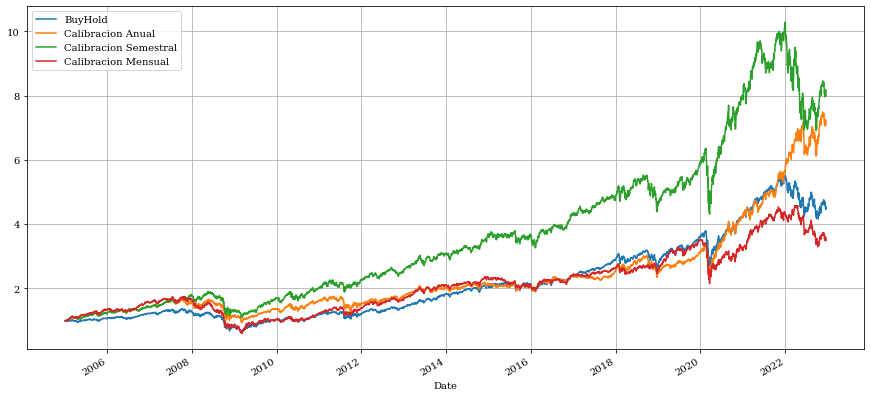

In [10]:
sinteticos = pd.DataFrame(index=df_sectors.index)
sinteticos['BuyHold'] = df_sectors.pct_change_SP500
sinteticos['Calibracion Anual'] = recalibrar_ciclo('Year')[1]
sinteticos['Calibracion Semestral'] = recalibrar_ciclo('Semester')[1]
sinteticos['Calibracion Mensual'] = recalibrar_ciclo('Month')[1]
sinteticos.index = df_sectors['Date']
sinteticos.dropna()
sinteticos_px = (sinteticos/100+1).cumprod()
sinteticos_px.plot(grid=True, figsize=(15,7))

Recalibrar el portafolio anualmente tiene una performance similar al SPX en forma consistente. Hacerlo mensualmente tiene una performance consistentemente peor, y hacerlo semestralmente tiene una performance consistentemente mejor, acumulando una suba de más de 11X en todo el ciclo. Por el carácter cíclico de esta estrategia, si bien sus bajas coinciden con los momentos de baja del SP500, tiende a posicionarse en sectores defensivos una vez que estos performan bien (por su condición de interpretar semestralmente el mejor sector y luego de esto reconfigurar el portafolio).

## Backtesting de estrategias encontradas y conclusión

Con dos criterios distintos, se han construido estrategias de posicionamiento en los diferentes sectores que componen el SP500, pero alterando la proporción de cada uno. La primer estrategia toma los once sectores que componen al SP500 y recompone anualmente las proporciones de cada uno basado en las mejores 10 simulaciones de un total de 1000 realizadas, tomando como métrica el ratio de sharpe y observando un año hacia atrás. La segunda estrategia se posiciona en partes iguales en dos sectores por semestre: el sector que resultó el mejor del último semestre y el sector que resultaría el mejor en caso de que el ciclo económico y el de negocios avancen tal como supone la modelización realizada por la guía de Standard and poor para inversión en sectores de 1995. La primer estrategia no presenta rendimientos superiores al buy and hold del SP500, mientras que la segunda sí lo consigue. Para terminar, analizaremos por medio de la librería quantstats la estrategia en forma completa.

In [11]:
sinteticos_final = pd.DataFrame(index=df_sectors.index)
sinteticos_final['BuyHold'] = df_sectors.pct_change_SP500
sinteticos_final['Estrategia de ciclos'] = recalibrar_ciclo('Semester')[1]
sinteticos_final = (sinteticos_final/100+1).cumprod()
sinteticos_final.index = df_sectors['Date']
sinteticos_final

,BuyHold,Estrategia de ciclos
Date,,
2004-12-31,NaN,NaN
2005-01-03,0.995284,0.981553
2005-01-04,0.983123,0.977326
2005-01-05,0.976338,0.972670
2005-01-06,0.981302,0.983429
...,...,...
2022-12-15,4.547063,8.061425
2022-12-16,4.493380,7.992049
2022-12-19,4.455277,7.989043


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 263 kB/s 
[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2004-12-31  2004-12-31
End Period                 2022-12-21  2022-12-21
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          731.71%     354.88%
CAGR﹪                     12.5%       8.79%

Sharpe                     0.69        0.53
Prob. Sharpe Ratio         99.8%       98.72%
Smart Sharpe               0.61        0.47
Sortino                    0.96        0.74
Smart Sortino              0.86        0.66
Sortino/√2                 0.68        0.52
Smart Sortino/√2           0.61        0.47
Omega                      1.14        1.14

Max Drawdown               -43.01%     -55.19%
Longest DD Days            876       

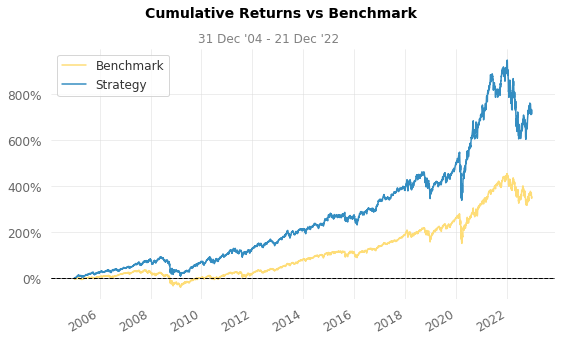

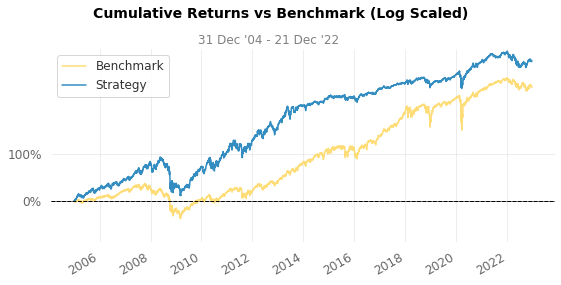

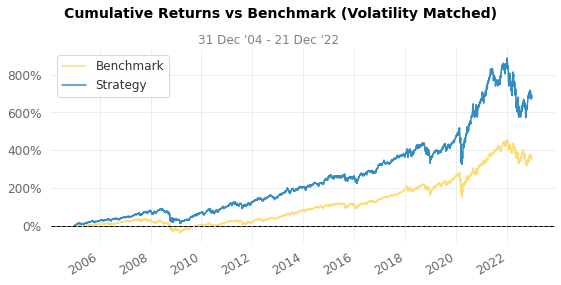

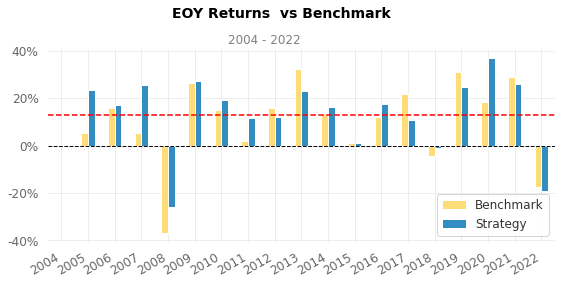

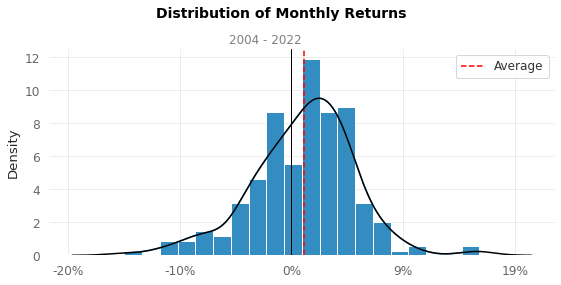

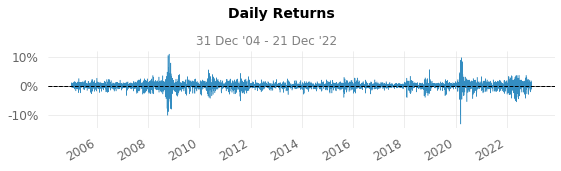

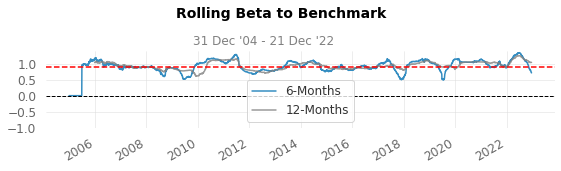

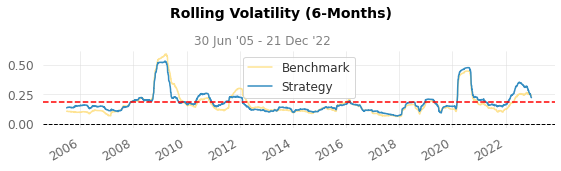

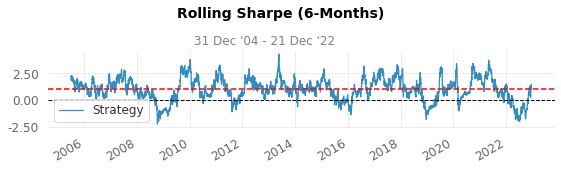

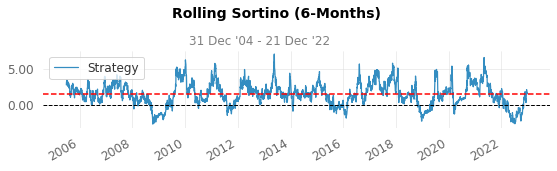

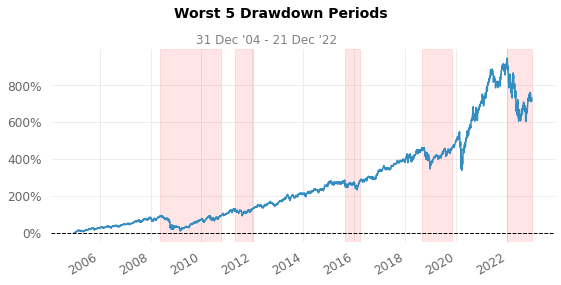

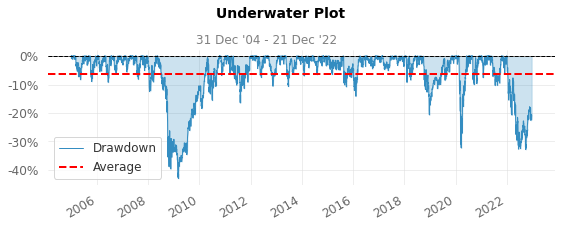

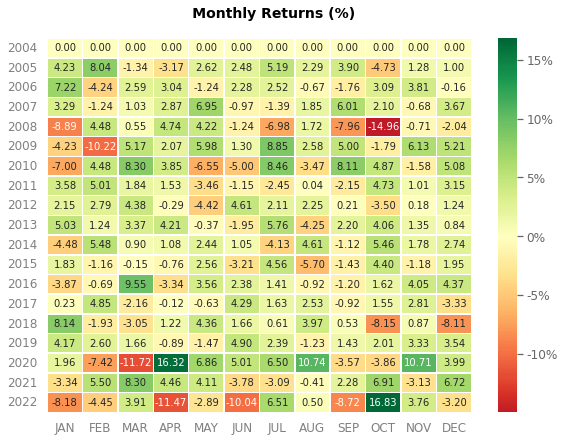

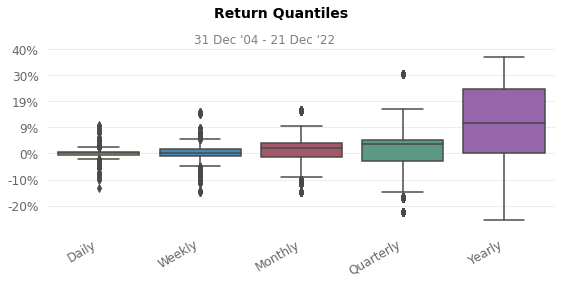

In [12]:
!pip3 install quantstats
import quantstats as qs
qs.extend_pandas()
qs.reports.full(sinteticos_final['Estrategia de ciclos'], sinteticos_final['BuyHold'])

Para el período 2005-2021, la estrategia de rotación semestral en partes iguales basada en la modelización estilizada de sectores presenta una ventaja considerable en términos de retorno acumulado y de CAGR con respecto al buy and hold del SP500: 1153% a 451% y 16.03% a 10.57%, respectivamente. Las métricas que incorporan la volatilidad como el Sharpe y el Sortino mejoran también. El sharpe ratio es de 0.83 en la estrategia, comparado con el 0.62 del buy and hold. Es interesante ver que en el año de la serie en el que el benchmark presenta una baja considerable (2008), la estrategia presenta una baja menor. El año 2022 con la baja del SP500 (al 25/11, 16% de baja YTD) resulta un desafío para que esta estrategia logre mantener esa ventaja en los momentos de baja. La estrategia de interpretar el ciclo económico, además, da lugar a múltiples análisis complementarios que permitan perfeccionar ese conocimiento del ciclo.

Como último punto, se proponen las siguientes líneas de investigación para futuros trabajos:

*   Realizar el rolling de sectores optimizando el ratio de sharpe, pero observando ventanas más largas que un solo año.
*   Posicionarse en función del ciclo económico y de mercado, pero a partir de un análisis más robusto que el del mejor sector (una opción podría ser un test de hipótesis basado en un ranking de rendimientos entre sectores comparado al teórico, o bien modelos de Machine Learning de series de tiempo)
*   Incorporar al análisis del ciclo económico algunas pautas macro, pudiendo hacer inferencias que incluyan variables adicionales al rendimiento de los sectores (variación del PBI, tasa FED, desempleo, déficit, inflación, etc).
*   A partir del conocimiento del lugar del ciclo económico en el que estamos, realizar el análisis de otras estrategias pero condicionado al momento del ciclo económico (ejemplo: posicionarse long en activos con RSI en sobreventa vs posicionarse long en activos con RSI en sobreventa dado que pertenecen a sectores que el ciclo recomienda).